In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

In [2]:
# creating sigmoid/logistic function - g(z)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [18]:
# computing cost function
def compute_cost(X, y, theta):
    m = len(y) # no of obs
    h = sigmoid(X.dot(theta)) # h = g(z) where z = theta.X 
    epsilon = 1e-5 # for computing non-zero log
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon))) # cost function to minimize
    return cost

In [19]:
# setting threshold of 0.5 to round up sigmoid function. predict class 1 for >= 0.5, class 0 for < 0.5
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [20]:
# computing gradient descent
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1)) # for simultaneous updation

    for i in range(iterations): 
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

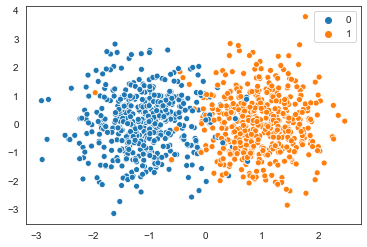

In [21]:
# creating data from inbuilt sklearn dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]
m = len(y)

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[0.05113902]
 [3.42472509]
 [0.035455  ]] 



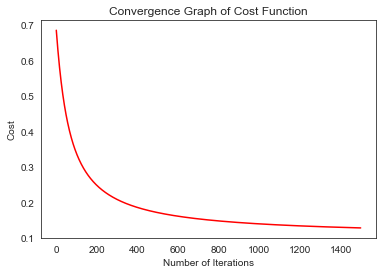

In [22]:
# performing logistic regression
X = np.hstack((np.ones((m,1)),X)) # adding 1's for intercept
n = np.size(X,1) 
params = np.zeros((n,1)) # matrix for storing thetas

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [15]:
X

array([[ 1.        , -1.0751613 , -0.4941634 ],
       [ 1.        , -1.25661008, -0.14773689],
       [ 1.        ,  1.75044402, -0.5073133 ],
       ...,
       [ 1.        , -1.90463498,  1.48358902],
       [ 1.        ,  0.43725922, -1.07598502],
       [ 1.        ,  0.6126847 , -0.66207321]])

In [16]:
y

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [17]:
params # for storing intercept (theta0), theta1 and theta2. It is essentially transpose

array([[0.],
       [0.],
       [0.]])

In [13]:
# finding accuracy
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

0.964


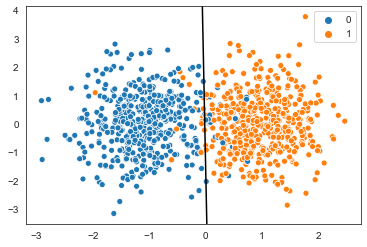

In [14]:
# visualizing decision boundary
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");